In [1]:
import numpy as np
from PIL import Image
from matplotlib import pylab as pylab
from matplotlib import pyplot as plt

from mdctn import mdct, imdct

# %matplotlib inline
pylab.rcParams['figure.figsize'] = (8, 8)

Text(0.5, 1.0, 'Original image in graymap')

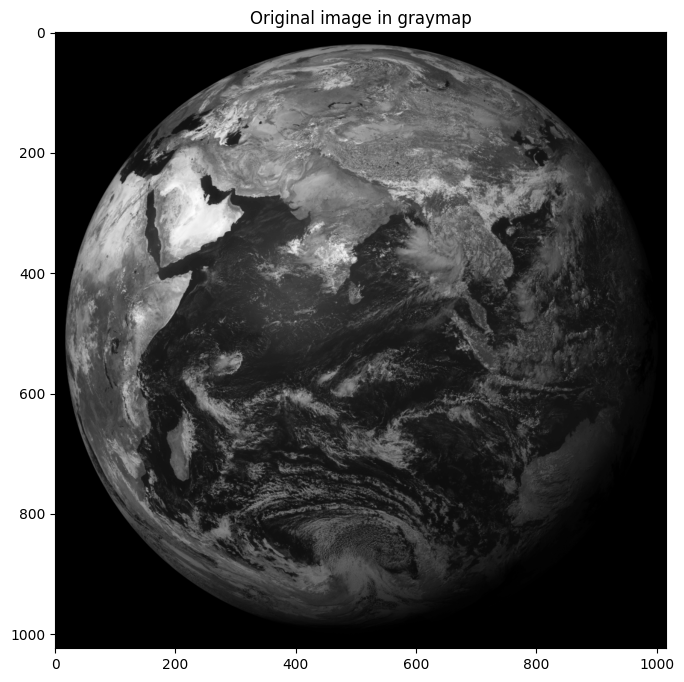

In [2]:
y, cb, cr = Image.open('images/earth-1024.png').convert('YCbCr').split()

im = np.array(y)
im = im[:im.shape[0] - im.shape[0]%8, :im.shape[1] - im.shape[1]%8]

im = im.astype(np.int64)

plt.figure()
plt.imshow(im, cmap='gray')
plt.title("Original image in graymap")

In [3]:
dct = np.zeros_like(im, dtype=np.float64)

im -= 128

from scipy.signal.windows import kaiser_bessel_derived as kbd

dct_type = 2
dct_norm = 'backward'
wfltr = kbd(16, 0.1)

wfltr = np.ones(16)

for i in range(im.shape[0]):
    dct[i] = mdct(im[i], N=16, type=dct_type, norm=dct_norm)

for i in range(dct.shape[1]):
    dct[:, i] = mdct(dct[:, i], N=16, type=dct_type, norm=dct_norm)

In [4]:
quant_table = [
  16,  11,  10,  16,  24,  40,  51,  61,
  12,  12,  14,  19,  26,  58,  60,  55,
  14,  13,  16,  24,  40,  57,  69,  56,
  14,  17,  22,  29,  51,  87,  80,  62,
  18,  22,  37,  56,  68, 109, 103,  77,
  24,  35,  55,  64,  81, 104, 113,  92,
  49,  64,  78,  87, 103, 121, 120, 101,
  72,  92,  95,  98, 112, 100, 103,  99,
]

for i in np.r_[:dct.shape[0]:8]:
    for j in np.r_[:dct.shape[1]:8]:
        dct[i:(i+8), j:(j+8)] = (np.rint(dct[i:(i+8), j:(j+8)].ravel() / quant_table) * quant_table).reshape((8, 8))

In [5]:
im_rec = np.zeros_like(im)

for i in range(dct.shape[1]):
    dct[:, i] = imdct(dct[:, i], N=16, type=dct_type, norm=dct_norm)

for i in range(im.shape[0]):
    im_rec[i] = imdct(dct[i], N=16, type=dct_type, norm=dct_norm)

im_rec += 128

Text(0.5, 1.0, 'Recovered image')

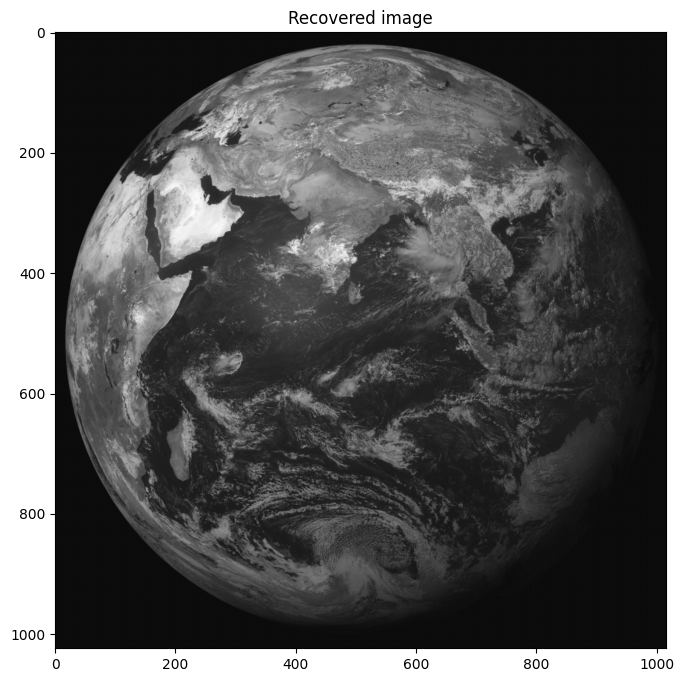

In [6]:
plt.figure()
plt.imshow(im_rec, cmap='gray')
plt.title("Recovered image")

In [7]:
# plt.imsave('mdct_orig_comparision.png', np.hstack([im, im_rec]), cmap='grey')
plt.imsave('mdct_orig_comparision.png', np.hstack((im, im_rec)), cmap='gray')

In [8]:
plt.imsave('mdct_rec.png', im_rec, cmap='gray')